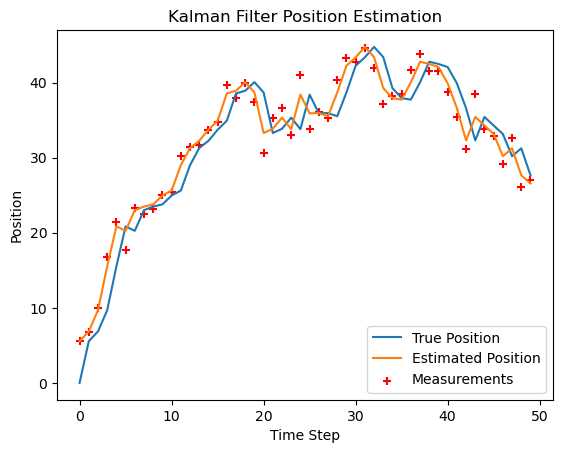

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the system
dt = 1.0  # time step
A = np.array([[1, dt], [0, 1]])  # state transition matrix
B = np.array([[0.5 * dt**2], [dt]])  # control input matrix
H = np.array([[1, 0]])  # measurement matrix
Q = np.array([[1, 0], [0, 3]])  # process noise covariance
R = np.array([[10]])  # measurement noise covariance
u = np.array([[0]])  # control vector (acceleration)

# Initial estimates
x = np.array([[0], [1]])  # initial state (position, velocity)
P = np.array([[1000, 0], [0, 1000]])  # initial error covariance

# Lists for plotting
true_positions = []
estimated_positions = []
measurements = []

# Simulate measurements
np.random.seed(0)
num_steps = 50
for _ in range(num_steps):
    true_position = x[0, 0]
    true_positions.append(true_position)

    # Generate noisy measurement
    z = np.dot(H, x) + np.random.normal(0, R[0, 0] ** 0.5)
    measurements.append(z[0, 0])

    # Prediction step
    x = np.dot(A, x) + np.dot(B, u)
    P = np.dot(A, np.dot(P, A.T)) + Q

    # Update step
    S = np.dot(H, np.dot(P, H.T)) + R
    K = np.dot(P, np.dot(H.T, np.linalg.inv(S)))
    y = z - np.dot(H, x)
    x = x + np.dot(K, y)
    P = P - np.dot(K, np.dot(H, P))

    estimated_positions.append(x[0, 0])

# Plotting results
plt.plot(true_positions, label='True Position')
plt.plot(estimated_positions, label='Estimated Position')
plt.scatter(range(num_steps), measurements, color='red', label='Measurements', marker='+')
plt.legend()
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.title('Kalman Filter Position Estimation')
plt.show()
